In [2]:
import numpy as np
import pandas as pd

## Visualization
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.figure_factory as ff


# Set ploting defaults
px.defaults.height                  = 550
pio.templates.default               = "plotly_white" # pio.templates
px.defaults.template                = "plotly_white"
px.defaults.color_continuous_scale  = px.colors.sequential.Teal_r
px.defaults.color_discrete_sequence = px.colors.sequential.Teal_r


In [21]:
df = pd.read_excel ("../Data/preprocessed/NG_ELECTION_TWEETS_CLEANED.xlsx")

In [3]:
df.head (3)

,Sentiment,cleaned_tweet
0,Positive,nobody say better goambassador mrmacaronii tak...
1,Neutral,getting pvc registering vote come nonviolent p...
2,Neutral,hear late dora akunyeli said peter obi


In [4]:
# go.pie
class_freq = df.groupby ("Sentiment").size ().to_frame (name="Frequency").reset_index ()
labels = class_freq.Sentiment
values = class_freq.Frequency

# fig = px.pie (
#   class_freq.reset_index (),
#   "Sentiment",
#   "Frequency",
#   color="Sentiment",
#   color_discrete_map={'Positive':'cyan',
#                       'Negative':'darkcyan',
#                       'Neutral':'lightcyan'}
# )

col = {'Positive':'cyan', 'Negative':'darkcyan', 'Neutral':'lightcyan'}

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_traces (
  marker=dict(colors=['darkcyan', 'lightcyan', 'cyan'])
  # color_discrete_map={'Positive':'cyan','Negative':'darkcyan', 'Neutral':'lightcyan'}
)
fig.update_layout (
  title="Sentiment Class Frequency", 
  height=550, width=500 * 1.5, showlegend=False
)


fig.show ()

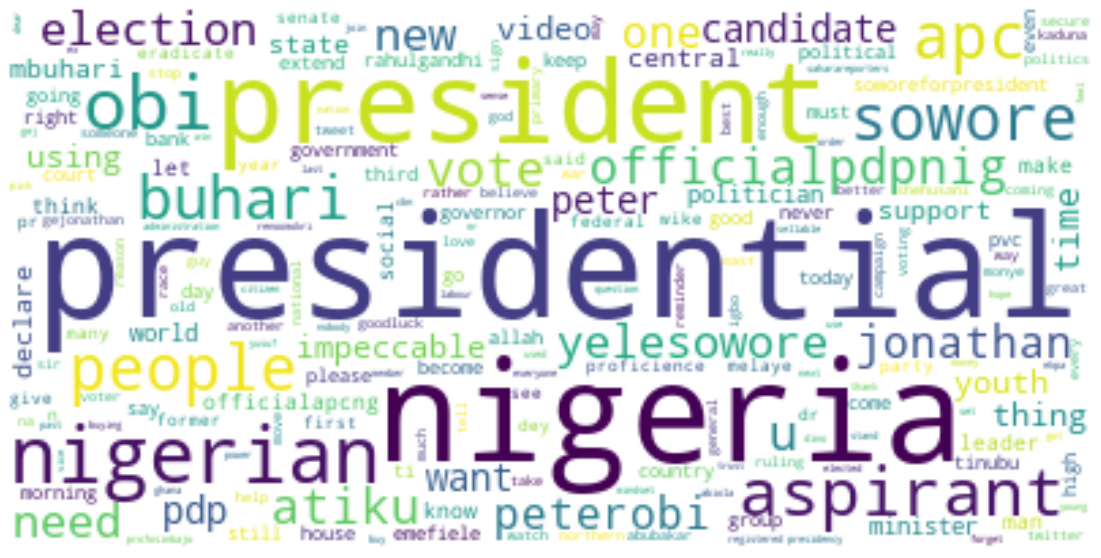

In [48]:
#Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset

plt.rcParams["figure.figsize"] = (25, 10)


text = " ".join(text.split()[1] for text in df.cleaned_tweet)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig ('../../Images/word_cloud')
plt.show()

In [ ]:
plt.savefig ()

In [10]:
keyPhrase = pd.read_csv ("../../Data/KEY_PHRASES.csv")

In [11]:
keyPhrase

,phrase,weight
0,sowore president,708.500000
1,president sowore president,615.333333
2,sowore president sowore,615.333333
3,sowore president nigeria,604.333333
4,apc presidential aspirant,587.000000
5,apc presidential form,560.333333
6,omoyele sowore president,533.000000
7,presidential aspirant,530.500000
8,vote sowore president,526.000000
9,alternative sowore president,517.333333


In [20]:
px.bar (
  keyPhrase.sort_values (by=['weight']),
  x="weight",
  y='phrase',
  color='weight',
  color_discrete_map='px.colors.sequential.Teal_r'
  # barmode='group'
)

In [55]:
word_freq_ = { }
for i, text in df.cleaned_tweet.iteritems ():
  for word in text.split (" "):
    word_freq_ [word] = (word_freq_.get (word, 0) + 1)

In [56]:
word_freq = pd.DataFrame (word_freq_,  ['frequency']).T.reset_index ().rename ({'index': 'word'}, axis=1).sort_values (by='frequency', ascending=False)
word_freq ['frequency'] = (word_freq ['frequency'] * 100) / word_freq ['frequency'].values.sum ()

In [57]:
px.bar (
  word_freq.head (20).sort_values (by='frequency', ascending=True),
  x="frequency",
  y='word',
  color='frequency',
  color_discrete_map='px.colors.sequential.Teal_r',
  height=700,
  # barmode='group'
)